In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

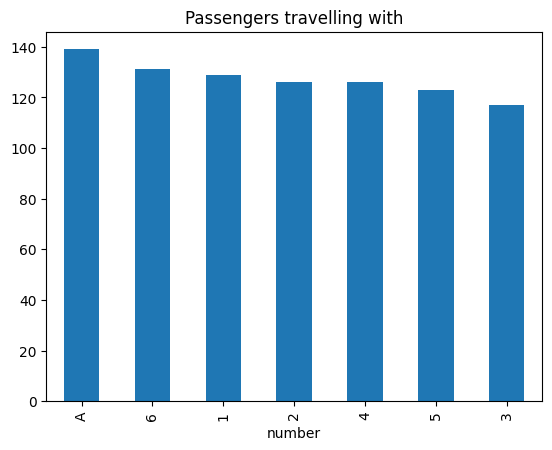

In [5]:
fig = df['number'].value_counts().plot.bar()
fig.set_title("Passengers travelling with")

In [6]:
# Extract numarical part
df['Number_numarical'] = pd.to_numeric(df['number'], errors = 'coerce', downcast = 'integer')

In [7]:
# Extract categorial part
df['Number_categorical'] = np.where(df['Number_numarical'].isnull(), df['number'], np.nan)

In [8]:
df.head()

,Cabin,Ticket,number,Survived,Number_numarical,Number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [9]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
df['Cabin_Num'] = df['Cabin'].str.extract('(\d+)') # captures numarical part
df['Cabin_Cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,Number_numarical,Number_categorical,Cabin_Num,Cabin_Cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [11]:
df['Cabin_Cat'].value_counts()

Cabin_Cat
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

<Axes: xlabel='Cabin_Cat'>

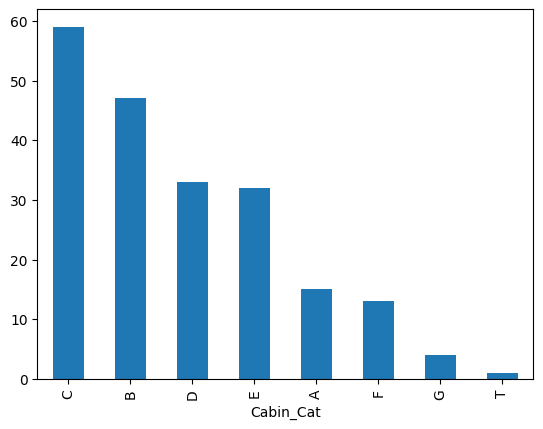

In [12]:
df['Cabin_Cat'].value_counts().plot(kind = 'bar')

In [13]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [23]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

,Cabin,Ticket,number,Survived,Number_numarical,Number_categorical,Cabin_Num,Cabin_Cat,Ticket_num,Ticket_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,Missed,NaN,NaN,NaN,A/5,21171.0,A/5
1,C85,PC 17599,3,1,3.0,Missed,85,C,NaN,PC,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,Missed,NaN,NaN,NaN,STON/O2.,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,Missed,123,C,113803.0,NaN,113803.0,NaN
4,NaN,373450,A,0,0.0,A,NaN,NaN,373450.0,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,Missed,NaN,NaN,330877.0,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,Missed,46,E,17463.0,NaN,17463.0,NaN
7,NaN,349909,5,0,5.0,Missed,NaN,NaN,349909.0,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,Missed,NaN,NaN,347742.0,NaN,347742.0,NaN
9,NaN,237736,A,1,0.0,A,NaN,NaN,237736.0,NaN,237736.0,NaN


In [24]:
df['Number_numarical'].fillna(0, inplace = True)

In [25]:
df.head()

,Cabin,Ticket,number,Survived,Number_numarical,Number_categorical,Cabin_Num,Cabin_Cat,Ticket_num,Ticket_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,Missed,NaN,NaN,NaN,A/5,21171.0,A/5
1,C85,PC 17599,3,1,3.0,Missed,85,C,NaN,PC,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,Missed,NaN,NaN,NaN,STON/O2.,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,Missed,123,C,113803.0,NaN,113803.0,NaN
4,NaN,373450,A,0,0.0,A,NaN,NaN,373450.0,NaN,373450.0,NaN


In [26]:
df['Number_categorical'].fillna("Missed", inplace = True)

In [27]:
df.head()

,Cabin,Ticket,number,Survived,Number_numarical,Number_categorical,Cabin_Num,Cabin_Cat,Ticket_num,Ticket_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,Missed,NaN,NaN,NaN,A/5,21171.0,A/5
1,C85,PC 17599,3,1,3.0,Missed,85,C,NaN,PC,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,Missed,NaN,NaN,NaN,STON/O2.,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,Missed,123,C,113803.0,NaN,113803.0,NaN
4,NaN,373450,A,0,0.0,A,NaN,NaN,373450.0,NaN,373450.0,NaN


In [29]:
df['Cabin_Num'].fillna("Missed", inplace = True)

In [30]:
df['Cabin_Cat'].fillna("Missed", inplace = True)

In [31]:
df.head()

,Cabin,Ticket,number,Survived,Number_numarical,Number_categorical,Cabin_Num,Cabin_Cat,Ticket_num,Ticket_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,Missed,Missed,Missed,NaN,A/5,21171.0,A/5
1,C85,PC 17599,3,1,3.0,Missed,85,C,NaN,PC,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,Missed,Missed,Missed,NaN,STON/O2.,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,Missed,123,C,113803.0,NaN,113803.0,NaN
4,NaN,373450,A,0,0.0,A,Missed,Missed,373450.0,NaN,373450.0,NaN


In [34]:
df.drop(['Ticket_cat', 'Ticket_num'], axis = 1, inplace = True)

In [35]:
df.head()

,Cabin,Ticket,number,Survived,Number_numarical,Number_categorical,Cabin_Num,Cabin_Cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,Missed,Missed,Missed,21171.0,A/5
1,C85,PC 17599,3,1,3.0,Missed,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,Missed,Missed,Missed,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,Missed,123,C,113803.0,NaN
4,NaN,373450,A,0,0.0,A,Missed,Missed,373450.0,NaN


In [36]:
df['ticket_cat'].fillna("Missed", inplace = True)

In [37]:
df.head()

,Cabin,Ticket,number,Survived,Number_numarical,Number_categorical,Cabin_Num,Cabin_Cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,Missed,Missed,Missed,21171.0,A/5
1,C85,PC 17599,3,1,3.0,Missed,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,Missed,Missed,Missed,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,Missed,123,C,113803.0,Missed
4,NaN,373450,A,0,0.0,A,Missed,Missed,373450.0,Missed
